In [61]:
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow.keras.activations import sigmoid
from tensorflow.keras.layers import Normalization,Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

### Creates a coffee roasting data set.
- roasting duration: 12-15 minutes is best
- temperature range: 175-260C is best

In [42]:
def loaddata():
    rng = np.random.default_rng(2)
    X = rng.random(400).reshape(-1,2)
    # 12-15 min is best, so scale to [12-15]
    X[:,1] = X[:,1]*4+11.5
    #350-500 F (175-260 C) is best
    X[:,0] = X[:,0]*(250-150)+150

    Y = np.zeros(len(X))

    #Finding a threshold
    i=0
    for t,d in X:
        y=-3/(260-175)*t+21
        #applying threshold
        if (t>175 and t<260 and d>12 and d<15 and d<=y):
            Y[i]=1
        else:
            Y[i]=0
        i+=1
    
    return X,Y.reshape(-1,1)

X,Y = loaddata()
X,Y


(array([[176.16121342,  12.69396457],
        [231.42257406,  11.86766377],
        [210.0100526 ,  14.41424211],
        [168.79010734,  11.72058651],
        [177.49693679,  14.12973206],
        [206.22656628,  12.10024905],
        [193.26307908,  14.17718919],
        [192.27846733,  14.0327376 ],
        [246.74359525,  14.23225929],
        [189.16248331,  12.24901028],
        [184.59606656,  13.54426389],
        [239.12094095,  14.60225577],
        [181.81466006,  15.19686759],
        [197.09098854,  14.27503537],
        [160.72073085,  11.91817423],
        [170.19074475,  15.03779869],
        [217.98114615,  14.89694529],
        [214.44362692,  13.12616959],
        [201.65781941,  13.87377407],
        [236.21179849,  13.25274466],
        [239.224011  ,  13.95486775],
        [232.93561258,  13.49222422],
        [219.25181318,  12.8561015 ],
        [202.28285039,  12.36489356],
        [160.0703602 ,  11.65441652],
        [220.19494764,  13.32572248],
        [239

## Plot data

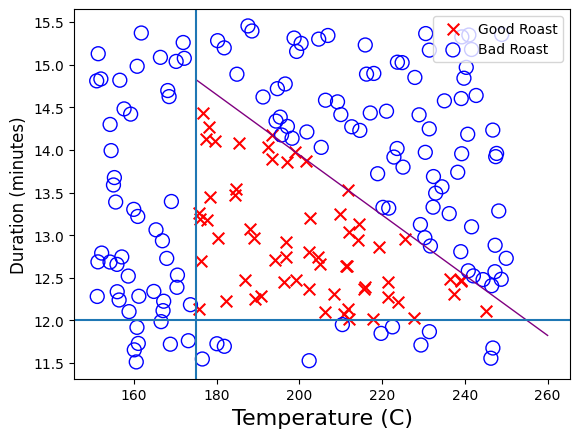

In [43]:
def plot_data(X,Y):
    Y = Y.reshape(-1)
    fig,ax = plt.subplots(1,1)

    #Good Roast Coffee
    ax.scatter(X[Y==1,0],X[Y==1,1],s=70,marker='x',c='red',label = "Good Roast")

    #Bad Roast Coffee
    ax.scatter(X[Y==0,0],X[Y==0,1], s=100, marker='o',facecolor='none',edgecolors='blue',label = "Bad Roast")

    #threshold
    tr = np.linspace(175,260,50)
    ax.plot(tr,(-3/85)*tr+21,color='purple',linewidth=1)
    #plot a horixontal line at y=12
    ax.axhline(y=12)
    #plot a vertical line at x=175
    ax.axvline(x=175)




    #labels
    ax.set_xlabel("Temperature (C)",size=16)
    ax.set_ylabel("Duration (minutes)",size=12)
    #legends
    ax.legend(loc='upper right')
    plt.show()
    
plot_data(X,Y)

### Normalize Data
Normalisation is the process of rescale data to have values within a specific range

In [44]:
print(f"Temperature Max, min pre normalization: {np.max(X[:,0]):0.2f}, {np.min(X[:,1]):0.2f}")
print(f"Duration Max, Min pre normalisation: {np.max(X[:,1]):0.2f}, {np.min(X[:,1]):0.2f}")

Temperature Max, min pre normalization: 250.00, 11.51
Duration Max, Min pre normalisation: 15.45, 11.51


In [72]:
#Applying normalization
norm_l = Normalization(axis=-1)
norm_l.adapt(X)
Xn = norm_l(X)
print(f"Temperature Max,Min post Normalisation: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"Duration Max,Min post Normalisation: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")

Temperature Max,Min post Normalisation: 1.66, -1.69
Duration Max,Min post Normalisation: 1.79, -1.70


## Increading the test samples

In [46]:
Xt=np.tile(Xn,(1000,1))
Yt=np.tile(Y,(1000,1))

print(Xt.shape,Yt.shape)

(200000, 2) (200000, 1)


In [47]:
a = np.array([[0.2, 0.5],
               [0.6, 0.8],
               [0.3, 0.9]])
np.tile(a,(5,1))

array([[0.2, 0.5],
       [0.6, 0.8],
       [0.3, 0.9],
       [0.2, 0.5],
       [0.6, 0.8],
       [0.3, 0.9],
       [0.2, 0.5],
       [0.6, 0.8],
       [0.3, 0.9],
       [0.2, 0.5],
       [0.6, 0.8],
       [0.3, 0.9],
       [0.2, 0.5],
       [0.6, 0.8],
       [0.3, 0.9]])

## Tensorflow Model

<center> <img src="img\RoastingNetwork.PNG"></center>

In [48]:
tf.random.set_seed(1234)
model = Sequential([
    Input(shape=(2,)), #Input is a tuple
    Dense(3, activation='sigmoid',name='layer1'),
    Dense(1, activation='sigmoid', name='layer2')
])

In [49]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

In [54]:
L1_num_params = 2*3+3 #as input is tuples is passed to 3 neurons each
L2_num_params = 3*1+1 #as activation is from 3 neurons is passed to 1 neuron

print(f"Layer 1 params= {L1_num_params},\nLayer 2 params= {L2_num_params}")

Layer 1 params= 9,
Layer 2 params= 4


In [59]:
w1,b1 = model.get_layer("layer1").get_weights()
w2,b2 = model.get_layer("layer2").get_weights()
print(f"W1{w1.shape}:\n",w1,f"\nb1: {b1.shape}:",b1)
print()
print(f"w2{w2.shape}:\n",w2,f"\nb2: {b2.shape}:",b2 )

W1(2, 3):
 [[ 1.0674102  -0.9537455   0.16400325]
 [ 0.44619834 -0.02744949 -0.8203274 ]] 
b1: (3,): [0. 0. 0.]

w2(3, 1):
 [[0.7601687 ]
 [0.67449963]
 [0.36983442]] 
b2: (1,): [0.]


#### Loss Function and compile optimization

model.compile() defines loss function and compile optimization


In [62]:
model.compile(
    loss =  BinaryCrossentropy(),
    optimizer = Adam(learning_rate=0.01),
)

### Fitting model
model.fit() runs gradient Descent and fits the weight to the data.

In [63]:
model.fit(
    Xt,Yt,
    epochs=10 
)

Epoch 1/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.4255
Epoch 2/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.1759
Epoch 3/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 0.0599
Epoch 4/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.0234
Epoch 5/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.0137
Epoch 6/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.0092
Epoch 7/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.0065
Epoch 8/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.0047
Epoch 9/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.0034
Epoch 10/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.0025


## Updated weight
After fitting the weight has been updated.

In [65]:
w1,b1 = model.get_layer("layer1").get_weights()
w2,b2 = model.get_layer("layer2").get_weights()
print("W1:\n",w1, "\nb:",b1)
print("W2:\n",w2, "\nb:",b2)

W1:
 [[  0.29559645 -28.918785    22.88398   ]
 [ 15.312166   -30.25489     -0.0866842 ]] 
b: [19.605608 13.770805 20.301739]
W2:
 [[23.823439]
 [20.730665]
 [19.913275]] 
b: [-52.810387]


### Predictions


In [70]:
X_test = np.array([
    [200,13.9], #positive example
    [200,17] #negative example
])

x_testn = norm_l(X_test)
predictions = model.predict(x_testn)
print("predictions = \n", predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
predictions = 
 [[9.999045e-01]
 [1.146315e-04]]


#### To convert the probabilities to a decision, we apply a threshold

In [76]:
yhat = np.zeros_like(predictions)
for i in range(len(predictions)):
    if predictions[i]>0.5:
        yhat[i]=1
        
    else:
        yhat[i]=0
print(f"decisions=\n {yhat}")
    

decisions=
 [[1.]
 [0.]]


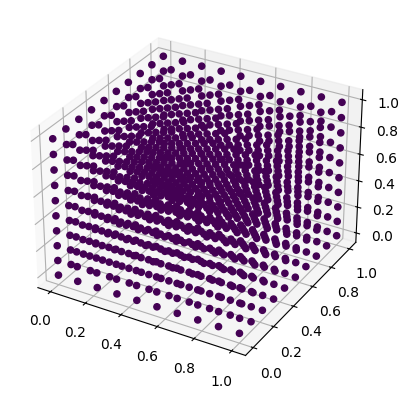

In [96]:
steps = 10
fig=plt.figure()
ax=fig.add_subplot(projection='3d')
x_=np.linspace(0.,1.,steps)
y_=np.linspace(0.,1.,steps)
z_=np.linspace(0.,1.,steps)

x,y,z = np.meshgrid(x_,y_,z_,indexing='ij')
ax.scatter(x,y,z,c=np.zeros((steps,steps,steps)),alpha=1)
